<a href="https://colab.research.google.com/github/Jionee/AI_colorization/blob/main/colorization_1129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Colorization

##### Importing Library


In [1]:
import os
import cv2
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras.utils.np_utils import to_categorical

##### Mounting Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Loading Image Dataset

In [3]:
train_path = './drive/MyDrive/testData'
test_path = './drive/MyDrive/testValidation'
#print(os.listdir("./drive/MyDrive/Colab Notebooks/Train/"))

#Normalize images
test_datagen = train_datagen = ImageDataGenerator(rescale=1./255)
#Resize images, if needed
train = train_datagen.flow_from_directory(train_path,target_size=(256,256),batch_size=300,class_mode=None)
test = test_datagen.flow_from_directory(test_path,target_size=(256,256),batch_size=100,class_mode=None)

#Convert from RGB to LAB
def generateDataset(imgs):
  X = []
  Y = []
  for img in imgs[0]:
    try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128) #for normalize -1 to 1
    except:
      print('error')
  X = np.array(X)
  Y = np.array(Y)
  X = X.reshape(X.shape+(1,)) #X and Y dimension should be same
  return [X,Y]
  
[X_train,Y_train] = generateDataset(train)
[X_test,Y_test] = generateDataset(test)

Found 300 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
error


##### Constructing Model

In [4]:
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam

inputs = Input(shape=(256,256,1))
x = inputs
#encoder
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x) 
x = Conv2D(64, 3, activation='relu', padding='same')(x) 


outputs = x


model = Model(inputs, outputs)
LEARNING_RATE = 0.01
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
Total params: 74,496
Trainable params: 74,496
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization

model = Sequential()
#encoder
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64 ,(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64 ,(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64 ,(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#decoder
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3),  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64 ,(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3,3),  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64 ,(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(2, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 128)     0

In [9]:
model = Sequential()
#encoder
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 512)      

In [7]:
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam

inputs = Input(shape=(256,256,1))
x = inputs
#encoder
_x = Conv2D(64, 3, activation='relu', padding='same')(x) 
_x = Conv2D(64, 3, activation='relu', padding='same')(_x) 
x = _x
_x = Conv2D(128, 3, activation='relu', padding='same')(x) 
_x = Conv2D(128, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x


_x = Conv2D(256, 3, activation='relu', padding='same')(x) 
_x = Conv2D(256, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x)  
x = x + _x
_x = Conv2D(512, 3, activation='relu', padding='same')(x) 
_x = Conv2D(512, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x)   
x = x + _x

#decoder
_x = Conv2D(256, 3, activation='relu', padding='same')(x) 
_x = Conv2D(256, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(128, 3, activation='relu', padding='same')(x) 
_x = Conv2D(128, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x


_x = Conv2D(64, 3, activation='relu', padding='same')(x) 
_x = Conv2D(64, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(32, 3, activation='relu', padding='same')(x) 
_x = Conv2D(32, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(16, 3, activation='relu', padding='same')(x) 
_x = Conv2D(16, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
x = Conv2D(2, 3, activation='tanh', padding='same')(x) 
outputs = x


model = Model(inputs, outputs)
LEARNING_RATE = 0.001
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_34[0][0]                  
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 256, 256, 64) 4160        conv2d_35[0][0]                  
_______________________________________________________________________________________

##### Model Training

In [10]:
fitModel = model.fit(X_train,Y_train, epochs=500, batch_size=100, validation_data=(X_test,Y_test))

Epoch 1/500
3/3 [==============================] - 11s 4s/step - loss: 0.5787 - accuracy: 0.5364 - val_loss: 0.0524 - val_accuracy: 0.3998
Epoch 2/500
3/3 [==============================] - 3s 1s/step - loss: 0.0254 - accuracy: 0.4871 - val_loss: 0.0155 - val_accuracy: 0.5942
Epoch 3/500
3/3 [==============================] - 3s 1s/step - loss: 0.0135 - accuracy: 0.6362 - val_loss: 0.0120 - val_accuracy: 0.6059
Epoch 4/500
3/3 [==============================] - 3s 1s/step - loss: 0.0124 - accuracy: 0.6412 - val_loss: 0.0120 - val_accuracy: 0.6060
Epoch 5/500
3/3 [==============================] - 3s 1s/step - loss: 0.0123 - accuracy: 0.6417 - val_loss: 0.0119 - val_accuracy: 0.6064
Epoch 6/500
3/3 [==============================] - 3s 1s/step - loss: 0.0122 - accuracy: 0.6416 - val_loss: 0.0120 - val_accuracy: 0.6062
Epoch 7/500
3/3 [==============================] - 3s 1s/step - loss: 0.0122 - accuracy: 0.6410 - val_loss: 0.0119 - val_accuracy: 0.6050
Epoch 8/500
3/3 [================

##### Plotting Accuracy


In [21]:
'''
def visModel():
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['training', 'validation'], loc = 'upper left')
  plt.show()
'''
def visLoss():
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['loss'])
  plt.plot(fitModel.history['val_loss'])
  plt.legend(['loss','val_loss'], loc = 'upper left')
  plt.show()

def visAccuracy():
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
  plt.show()


##### Model Save & Caculating Accuracy

4/4 [==============================] - 0s 55ms/step - loss: 0.0127 - accuracy: 0.5889
Test accuracy:  [0.012699863873422146, 0.588910698890686]


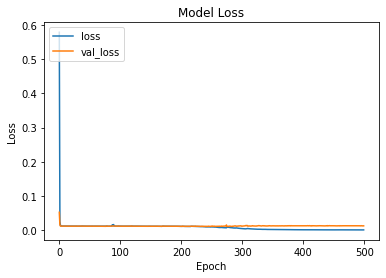

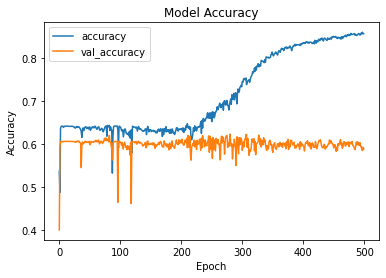

INFO:tensorflow:Assets written to: ./sample_data/variables/colorize_autoencoder.model/assets


In [22]:
#model_accuracy
results = model.evaluate(X_test, Y_test)

print('Test accuracy: ', results)

#visualization Model
visLoss()
visAccuracy()

#save
model.save('./sample_data/variables/colorize_autoencoder.model')

##### PSNR 

In [14]:
import math
import numpy

# def calPSNR (img1,img2):
#   mse=numpy.mean((img1-img2)**2)
#   if mse==0:
#     return 100
#   PIXEL_MAX=255.0
#   return 20*math.log10(PIXEL_MAX/math.sqrt(mse))

  # 케라스 psnr 평가 metric 예시
def calPSNR(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

##### Result Images

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 6 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


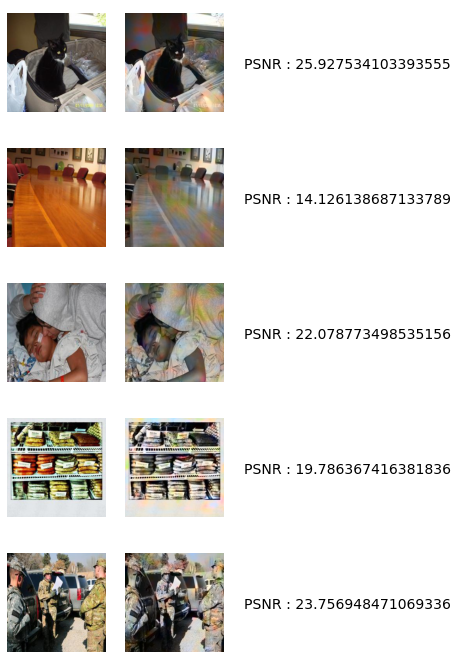

In [24]:
model = tf.keras.models.load_model(
    './sample_data/variables/colorize_autoencoder.model',
    custom_objects=None,
    compile=True
)

output = model.predict(X_test)
output = output*128 # (1, 256, 256, 2)

result = np.zeros((100,256,256,3))
result[:,:,:,0] = X_test[:,:,:,0] #L
#result[:,:,:,1:] = Y_test[:,:,:,0:] *128 #AB
#result[:,:,:,1] = Y_test[:,:,:,0] *128 #AB
# result[:,:,:,2] = Y_test[:,:,:,1] *128 #AB
#result[:,:,:,1] = output[:,:,:,0] *128 #AB
#result[:,:,:,2] = output[:,:,:,1] *128 #AB
result[:,:,:,1:] = output#AB
pred_Imgs = [lab2rgb(result[i]) for i in range(100)]
# imsave("result.png",lab2rgb(result))

plt.figure(figsize=(6,12))
plt.title("Test vs Predicted Test")
i=1
for j in range(5):
  #j=j
  j = np.random.randint(0,99)
  plt.subplot(5,3,i)
  plt.axis('off')
  plt.imshow(test[0][j])
  plt.subplot(5,3,i+1)
  plt.axis('off')
  plt.imshow(pred_Imgs[j])
  #plt.imshow(Y_test[0])
  plt.subplot(5,3,i+2)
  plt.axis('off')


  PSNR = calPSNR(test[0][j],pred_Imgs[j])
  plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
  i += 3
  #print("\nPSNR :" ,PSNR)

In [ ]:
print("===result==========================")
print(result.shape)
print(result[0])
print("===test_imgs==========================")
print(test[0][0])
print("===pred_imgs==========================")
print(pred_Imgs[0])

